In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.preprocessing.text import Tokenizer
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt


In [2]:
films = pd.read_csv('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\wiki_movie_plots_deduped.csv')
films = films[['Plot', 'Genre']]
films.drop(films[films['Genre'] == 'unknown'].index, inplace = True)
films.reset_index(drop = True, inplace = True)
mostFrequentGenres = films['Genre'].value_counts()[:10]
genresList = mostFrequentGenres.index.tolist()
print(mostFrequentGenres.sort_values(ascending = False))

drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64


In [3]:
filmsFrequent = films[films['Genre'].isin(genresList)]
filmsDrama = filmsFrequent[filmsFrequent['Genre'] == 'drama'].sample(5000, replace = True)
filmsComedy = filmsFrequent[filmsFrequent['Genre'] == 'comedy'].sample(5000, replace = True)
filmsHorror = filmsFrequent[filmsFrequent['Genre'] == 'horror'].sample(5000, replace = True)
filmsAction = filmsFrequent[filmsFrequent['Genre'] == 'action'].sample(5000, replace = True)
filmsThriller = filmsFrequent[filmsFrequent['Genre'] == 'thriller'].sample(5000, replace = True)
filmsRomance = filmsFrequent[filmsFrequent['Genre'] == 'romance'].sample(5000, replace = True)
filmsWestern = filmsFrequent[filmsFrequent['Genre'] == 'western'].sample(5000, replace = True)
filmsCrime = filmsFrequent[filmsFrequent['Genre'] == 'crime'].sample(5000, replace = True)
filmsAdventure = filmsFrequent[filmsFrequent['Genre'] == 'adventure'].sample(5000, replace = True)
filmsMusical = filmsFrequent[filmsFrequent['Genre'] == 'musical'].sample(5000, replace = True)
filmsOver = pd.concat([filmsDrama, filmsComedy, filmsHorror, filmsAction, filmsThriller, filmsRomance, filmsWestern,
                       filmsCrime, filmsAdventure, filmsMusical])
filmsOver = filmsOver.sample(frac = 1).reset_index(drop = True)
print(filmsOver['Genre'].value_counts().sort_values(ascending = False))
X = filmsOver['Plot'].values
y = filmsOver['Genre'].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)

horror       5000
romance      5000
action       5000
thriller     5000
crime        5000
comedy       5000
drama        5000
western      5000
musical      5000
adventure    5000
Name: Genre, dtype: int64


In [4]:
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(XTrain)

In [5]:
XTrain = tokenizer.texts_to_sequences(XTrain)
XTest = tokenizer.texts_to_sequences(XTest)

In [6]:
from keras.preprocessing.sequence import pad_sequences

XTrain = pad_sequences(XTrain, padding = 'post', maxlen = 500)
XTest = pad_sequences(XTest, padding = 'post', maxlen = 500)
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(35000, 500) (15000, 500) (35000,) (15000,)


In [7]:
def createEmbMatrix(filePath, wordIndex, embDim):
    vocabSize = len(wordIndex) + 1
    embMatrix = np.zeros((vocabSize, embDim))
    with open(filePath, encoding = 'utf8') as f:
        for line in f:
            word, *vector = line.split()
            if word in wordIndex:
                idx = wordIndex[word]
                embMatrix[idx] = np.array(vector, dtype = np.float32)[:embDim]
    return embMatrix

In [8]:
embMatrix = createEmbMatrix('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\glove.6B.50d.txt', tokenizer.word_index, 50)

In [9]:
vocabSize = len(tokenizer.word_index) + 1
vocabSize

88912

In [10]:
print(np.count_nonzero(np.count_nonzero(embMatrix, axis = 1))/len(tokenizer.word_index) + 1)

1.6863492706189336


In [11]:
model1 = Sequential()
model1.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = True))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history1 = model1.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 27s 73ms/step - loss: 2.4864 - acc: 0.1021 - val_loss: 2.4176 - val_acc: 0.1325
Epoch 2/200
350/350 [==============================] - 23s 65ms/step - loss: 2.4147 - acc: 0.1197 - val_loss: 2.3995 - val_acc: 0.1383
Epoch 3/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3980 - acc: 0.1215 - val_loss: 2.3829 - val_acc: 0.1431
Epoch 4/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3823 - acc: 0.1194 - val_loss: 2.3698 - val_acc: 0.1546
Epoch 5/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3684 - acc: 0.1244 - val_loss: 2.3549 - val_acc: 0.1430
Epoch 6/200
350/350 [==============================] - 22s 64ms/step - loss: 2.3565 - acc: 0.1277 - val_loss: 2.3430 - val_acc: 0.1583
Epoch 7/200
350/350 [==============================] - 8s 23ms/step - loss: 2.3436 - acc: 0.1323 - val_loss: 2.3321 - val_acc: 0.1603
Epoch 8/200
350/350 [==============================] - 6

Epoch 62/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0610 - acc: 0.2322 - val_loss: 1.9597 - val_acc: 0.3781
Epoch 63/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0631 - acc: 0.2326 - val_loss: 1.9532 - val_acc: 0.3722
Epoch 64/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0595 - acc: 0.2332 - val_loss: 1.9423 - val_acc: 0.3775
Epoch 65/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0529 - acc: 0.2380 - val_loss: 1.9599 - val_acc: 0.3776
Epoch 66/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0446 - acc: 0.2396 - val_loss: 1.9549 - val_acc: 0.3760
Epoch 67/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0529 - acc: 0.2378 - val_loss: 1.9368 - val_acc: 0.3823
Epoch 68/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0546 - acc: 0.2354 - val_loss: 1.9382 - val_acc: 0.3794
Epoch 69/200
350/350 [==============================] -

350/350 [==============================] - 8s 23ms/step - loss: 1.9318 - acc: 0.2837 - val_loss: 1.7625 - val_acc: 0.4356
Epoch 183/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9387 - acc: 0.2799 - val_loss: 1.7451 - val_acc: 0.4335
Epoch 184/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9305 - acc: 0.2807 - val_loss: 1.7534 - val_acc: 0.4279
Epoch 185/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9359 - acc: 0.2809 - val_loss: 1.8214 - val_acc: 0.4007
Epoch 186/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9278 - acc: 0.2844 - val_loss: 1.7721 - val_acc: 0.4345
Epoch 187/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9383 - acc: 0.2757 - val_loss: 1.7627 - val_acc: 0.4303
Epoch 188/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9347 - acc: 0.2827 - val_loss: 1.7758 - val_acc: 0.4275
Epoch 189/200
350/350 [==============================] - 8s 23

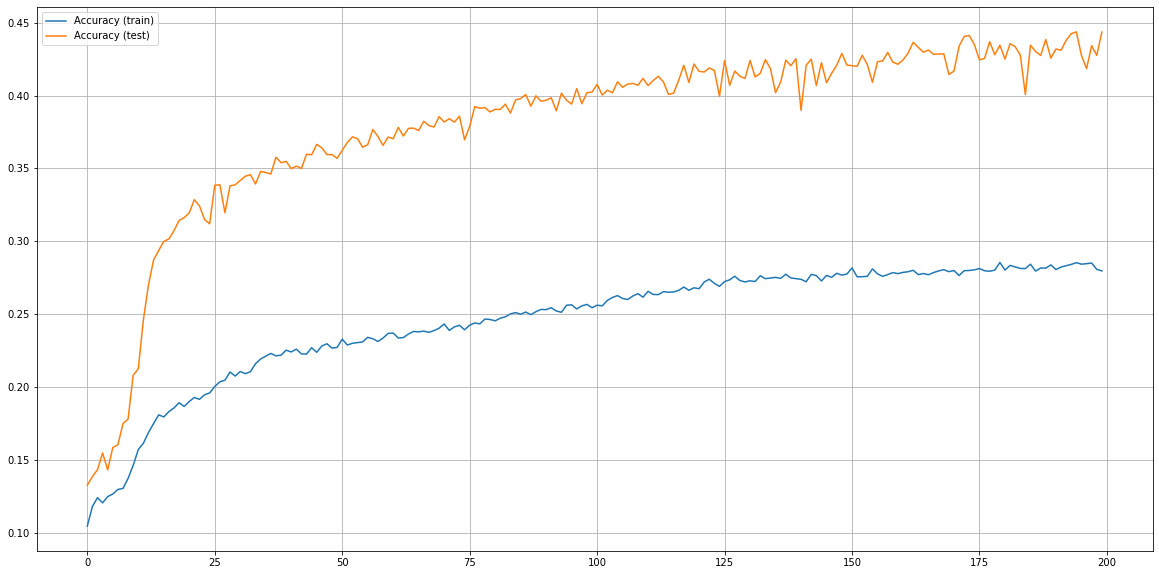

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 10])
plt.plot(history1.history['acc'], label = 'Accuracy (train)')
plt.plot(history1.history['val_acc'], label = 'Accuracy (test)')
plt.grid()
plt.legend()
plt.show()

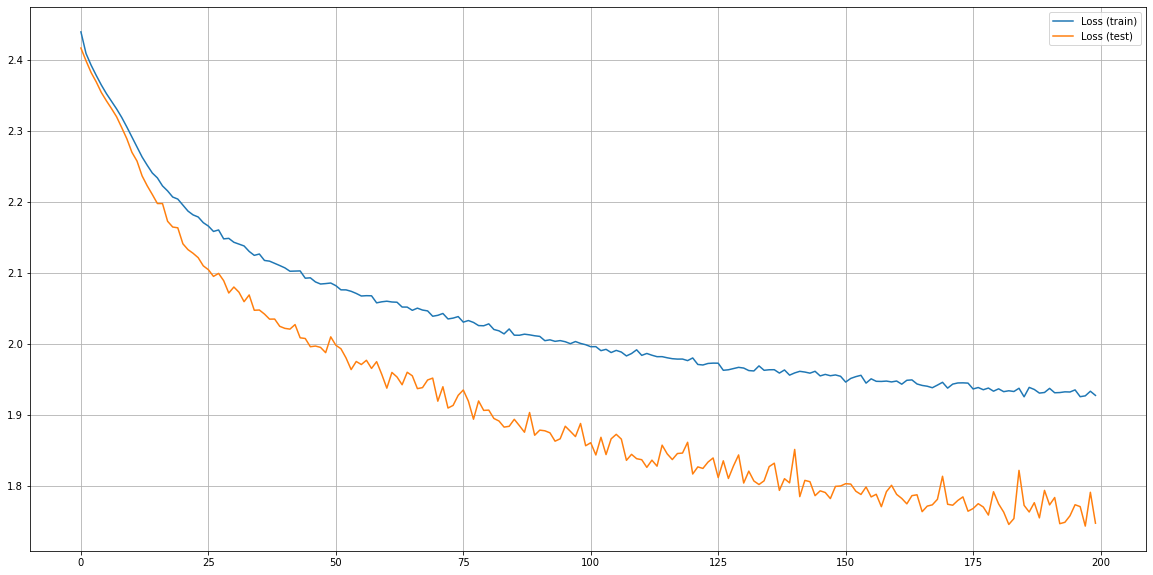

In [13]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['loss'], label = 'Loss (train)')
plt.plot(history1.history['val_loss'], label = 'Loss (test)')
plt.grid()
plt.legend()
plt.show()

In [14]:
model1.save('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\glove_1.h5')

In [15]:
model2 = Sequential()
model2.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = False))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history2 = model2.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4795 - acc: 0.0982 - val_loss: 2.4241 - val_acc: 0.1057
Epoch 2/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4203 - acc: 0.1047 - val_loss: 2.4079 - val_acc: 0.1033
Epoch 3/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4046 - acc: 0.1006 - val_loss: 2.3941 - val_acc: 0.1039
Epoch 4/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3912 - acc: 0.1002 - val_loss: 2.3821 - val_acc: 0.1040
Epoch 5/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3795 - acc: 0.0989 - val_loss: 2.3715 - val_acc: 0.1033
Epoch 6/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3694 - acc: 0.1028 - val_loss: 2.3624 - val_acc: 0.1009
Epoch 7/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3604 - acc: 0.1032 - val_loss: 2.3543 - val_acc: 0.1055
Epoch 8/200
350/350 [==============================] - 2s 5ms/step - 

350/350 [==============================] - 2s 7ms/step - loss: 2.1680 - acc: 0.2147 - val_loss: 2.0861 - val_acc: 0.3080
Epoch 124/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1655 - acc: 0.2147 - val_loss: 2.0907 - val_acc: 0.2854
Epoch 125/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1705 - acc: 0.2131 - val_loss: 2.0931 - val_acc: 0.3125
Epoch 126/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1606 - acc: 0.2193 - val_loss: 2.0827 - val_acc: 0.3058
Epoch 127/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1654 - acc: 0.2144 - val_loss: 2.0824 - val_acc: 0.3105
Epoch 128/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1655 - acc: 0.2171 - val_loss: 2.1010 - val_acc: 0.2913
Epoch 129/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1714 - acc: 0.2130 - val_loss: 2.0855 - val_acc: 0.3117
Epoch 130/200
350/350 [==============================] - 2s 7ms/step 

Epoch 184/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1587 - acc: 0.2169 - val_loss: 2.0744 - val_acc: 0.2973
Epoch 185/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1596 - acc: 0.2183 - val_loss: 2.1491 - val_acc: 0.2403
Epoch 186/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1629 - acc: 0.2133 - val_loss: 2.0775 - val_acc: 0.3094
Epoch 187/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1617 - acc: 0.2160 - val_loss: 2.0786 - val_acc: 0.2845
Epoch 188/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1545 - acc: 0.2182 - val_loss: 2.0756 - val_acc: 0.2943
Epoch 189/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1575 - acc: 0.2138 - val_loss: 2.1037 - val_acc: 0.2954
Epoch 190/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1568 - acc: 0.2170 - val_loss: 2.0787 - val_acc: 0.3000
Epoch 191/200
350/350 [==============================] 

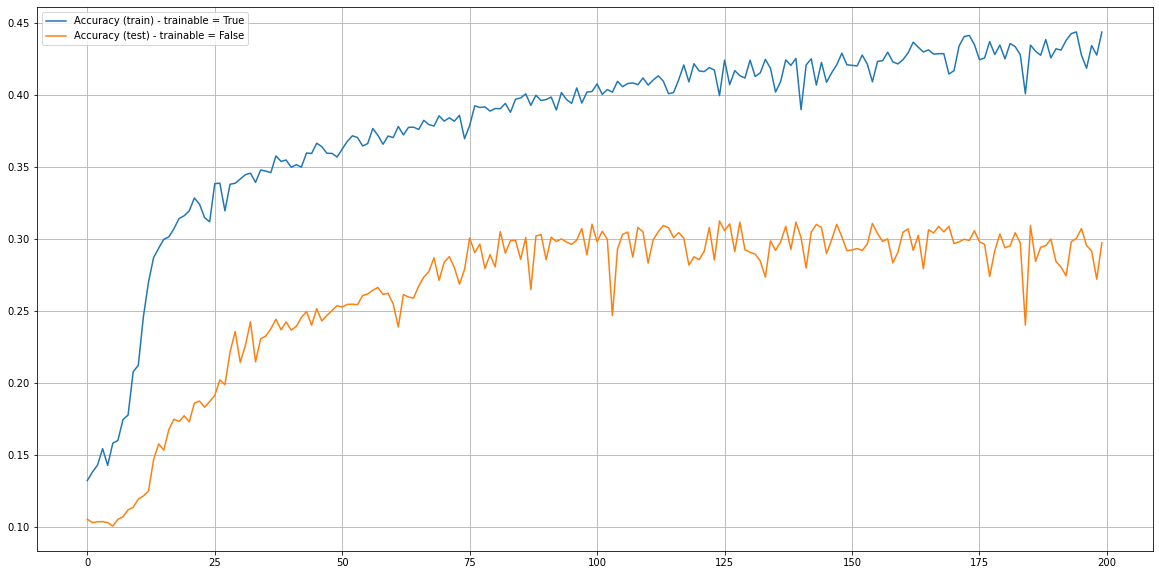

In [17]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['val_acc'], label = 'Accuracy (train) - trainable = True')
plt.plot(history2.history['val_acc'], label = 'Accuracy (test) - trainable = False')
plt.grid()
plt.legend()
plt.show()

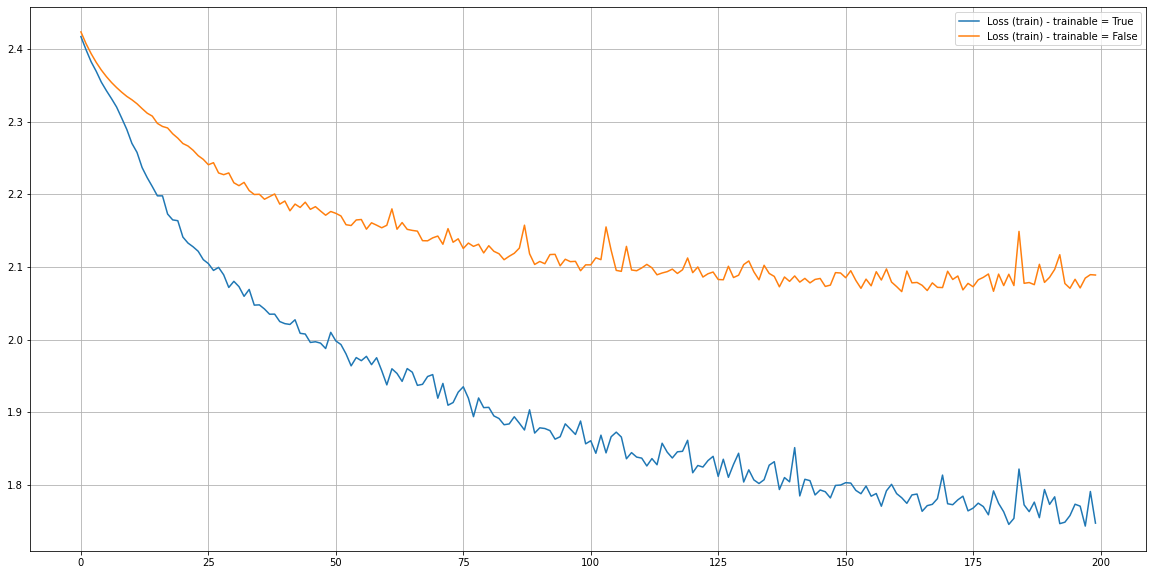

In [19]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['val_loss'], label = 'Loss (train) - trainable = True')
plt.plot(history2.history['val_loss'], label = 'Loss (train) - trainable = False')
plt.grid()
plt.legend()
plt.show()

In [27]:
model3 = Sequential()
model3.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = False))
model3.add(layers.GlobalMaxPool1D())
model3.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation = 'softmax'))
model3.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history3 = model3.fit(XTrain, yTrain, epochs = 50, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/50
350/350 [==============================] - 2s 5ms/step - loss: 2.4915 - acc: 0.1013 - val_loss: 2.4177 - val_acc: 0.1147
Epoch 2/50
350/350 [==============================] - 2s 5ms/step - loss: 2.4147 - acc: 0.1130 - val_loss: 2.3997 - val_acc: 0.1233
Epoch 3/50
350/350 [==============================] - 2s 5ms/step - loss: 2.3965 - acc: 0.1169 - val_loss: 2.3796 - val_acc: 0.1308
Epoch 4/50
350/350 [==============================] - 2s 5ms/step - loss: 2.3808 - acc: 0.1199 - val_loss: 2.3629 - val_acc: 0.1476
Epoch 5/50
350/350 [==============================] - 2s 5ms/step - loss: 2.3657 - acc: 0.1224 - val_loss: 2.3456 - val_acc: 0.1516
Epoch 6/50
350/350 [==============================] - 2s 5ms/step - loss: 2.3489 - acc: 0.1283 - val_loss: 2.3308 - val_acc: 0.1657
Epoch 7/50
350/350 [==============================] - 2s 5ms/step - loss: 2.3340 - acc: 0.1381 - val_loss: 2.3142 - val_acc: 0.1645
Epoch 8/50
350/350 [==============================] - 2s 5ms/step - loss: 2.

In [28]:
model3.layers[0].trainable = True
model3.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history4 = model3.fit(XTrain, yTrain, epochs = 350, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/350
350/350 [==============================] - 7s 19ms/step - loss: 2.1785 - acc: 0.1845 - val_loss: 2.1391 - val_acc: 0.2731
Epoch 2/350
350/350 [==============================] - 6s 18ms/step - loss: 2.1740 - acc: 0.1872 - val_loss: 2.1045 - val_acc: 0.2838
Epoch 3/350
350/350 [==============================] - 7s 19ms/step - loss: 2.1673 - acc: 0.1881 - val_loss: 2.1121 - val_acc: 0.2807
Epoch 4/350
350/350 [==============================] - 7s 20ms/step - loss: 2.1669 - acc: 0.1847 - val_loss: 2.1064 - val_acc: 0.2893
Epoch 5/350
350/350 [==============================] - 7s 19ms/step - loss: 2.1610 - acc: 0.1836 - val_loss: 2.0997 - val_acc: 0.2881
Epoch 6/350
350/350 [==============================] - 7s 19ms/step - loss: 2.1589 - acc: 0.1889 - val_loss: 2.0925 - val_acc: 0.2754
Epoch 7/350
350/350 [==============================] - 6s 18ms/step - loss: 2.1533 - acc: 0.1913 - val_loss: 2.0836 - val_acc: 0.2829
Epoch 8/350
350/350 [==============================] - 6s 18ms

350/350 [==============================] - 8s 23ms/step - loss: 2.0519 - acc: 0.2437 - val_loss: 1.9511 - val_acc: 0.3562
Epoch 62/350
350/350 [==============================] - 8s 22ms/step - loss: 2.0536 - acc: 0.2410 - val_loss: 1.9434 - val_acc: 0.3669
Epoch 63/350
350/350 [==============================] - 9s 25ms/step - loss: 2.0572 - acc: 0.2378 - val_loss: 1.9341 - val_acc: 0.3683
Epoch 64/350
350/350 [==============================] - 9s 25ms/step - loss: 2.0501 - acc: 0.2410 - val_loss: 1.9307 - val_acc: 0.3611
Epoch 65/350
350/350 [==============================] - 9s 25ms/step - loss: 2.0522 - acc: 0.2443 - val_loss: 1.9338 - val_acc: 0.3685
Epoch 66/350
350/350 [==============================] - 10s 29ms/step - loss: 2.0490 - acc: 0.2419 - val_loss: 1.9174 - val_acc: 0.3737
Epoch 67/350
350/350 [==============================] - 8s 22ms/step - loss: 2.0483 - acc: 0.2448 - val_loss: 1.9266 - val_acc: 0.3655
Epoch 68/350
350/350 [==============================] - 8s 23ms/ste

350/350 [==============================] - 8s 23ms/step - loss: 1.9962 - acc: 0.2601 - val_loss: 1.8424 - val_acc: 0.3987
Epoch 122/350
350/350 [==============================] - 7s 21ms/step - loss: 2.0000 - acc: 0.2565 - val_loss: 1.8535 - val_acc: 0.4021
Epoch 123/350
350/350 [==============================] - 7s 21ms/step - loss: 1.9893 - acc: 0.2604 - val_loss: 1.8819 - val_acc: 0.3816
Epoch 124/350
350/350 [==============================] - 8s 22ms/step - loss: 2.0020 - acc: 0.2572 - val_loss: 1.8685 - val_acc: 0.4073
Epoch 125/350
350/350 [==============================] - 9s 25ms/step - loss: 1.9950 - acc: 0.2627 - val_loss: 1.8567 - val_acc: 0.4108
Epoch 126/350
350/350 [==============================] - 8s 24ms/step - loss: 1.9930 - acc: 0.2617 - val_loss: 1.8258 - val_acc: 0.4069
Epoch 127/350
350/350 [==============================] - 10s 28ms/step - loss: 1.9923 - acc: 0.2601 - val_loss: 1.8655 - val_acc: 0.4009
Epoch 128/350
350/350 [==============================] - 8s 2

350/350 [==============================] - 9s 25ms/step - loss: 1.9633 - acc: 0.2670 - val_loss: 1.8138 - val_acc: 0.4139
Epoch 182/350
350/350 [==============================] - 9s 25ms/step - loss: 1.9692 - acc: 0.2684 - val_loss: 1.8371 - val_acc: 0.4151
Epoch 183/350
350/350 [==============================] - 8s 23ms/step - loss: 1.9668 - acc: 0.2732 - val_loss: 1.7780 - val_acc: 0.4170
Epoch 184/350
350/350 [==============================] - 10s 28ms/step - loss: 1.9541 - acc: 0.2673 - val_loss: 1.7681 - val_acc: 0.4127
Epoch 185/350
350/350 [==============================] - 8s 23ms/step - loss: 1.9629 - acc: 0.2699 - val_loss: 1.7711 - val_acc: 0.4186
Epoch 186/350
350/350 [==============================] - 9s 25ms/step - loss: 1.9610 - acc: 0.2700 - val_loss: 1.7624 - val_acc: 0.4151
Epoch 187/350
350/350 [==============================] - 8s 24ms/step - loss: 1.9592 - acc: 0.2680 - val_loss: 1.7738 - val_acc: 0.4187
Epoch 188/350
350/350 [==============================] - 9s 2

350/350 [==============================] - 8s 22ms/step - loss: 1.9202 - acc: 0.3024 - val_loss: 1.7469 - val_acc: 0.4389
Epoch 242/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9143 - acc: 0.2992 - val_loss: 1.7071 - val_acc: 0.4363
Epoch 243/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9217 - acc: 0.2955 - val_loss: 1.7555 - val_acc: 0.4216
Epoch 244/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9097 - acc: 0.2999 - val_loss: 1.7466 - val_acc: 0.4282
Epoch 245/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9198 - acc: 0.2956 - val_loss: 1.7158 - val_acc: 0.4337
Epoch 246/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9115 - acc: 0.2973 - val_loss: 1.7109 - val_acc: 0.4247
Epoch 247/350
350/350 [==============================] - 8s 22ms/step - loss: 1.9171 - acc: 0.2976 - val_loss: 1.7423 - val_acc: 0.4319
Epoch 248/350
350/350 [==============================] - 8s 22

350/350 [==============================] - 8s 22ms/step - loss: 1.8842 - acc: 0.3095 - val_loss: 1.6863 - val_acc: 0.4330
Epoch 302/350
350/350 [==============================] - 7s 21ms/step - loss: 1.8852 - acc: 0.3096 - val_loss: 1.7256 - val_acc: 0.4321
Epoch 303/350
350/350 [==============================] - 8s 22ms/step - loss: 1.8802 - acc: 0.3119 - val_loss: 1.6691 - val_acc: 0.4185
Epoch 304/350
350/350 [==============================] - 7s 21ms/step - loss: 1.8721 - acc: 0.3125 - val_loss: 1.6859 - val_acc: 0.4404
Epoch 305/350
350/350 [==============================] - 8s 24ms/step - loss: 1.8838 - acc: 0.3077 - val_loss: 1.6920 - val_acc: 0.4476
Epoch 306/350
350/350 [==============================] - 9s 27ms/step - loss: 1.8847 - acc: 0.3136 - val_loss: 1.6943 - val_acc: 0.4460
Epoch 307/350
350/350 [==============================] - 9s 25ms/step - loss: 1.8960 - acc: 0.3034 - val_loss: 1.7108 - val_acc: 0.4448
Epoch 308/350
350/350 [==============================] - 8s 22

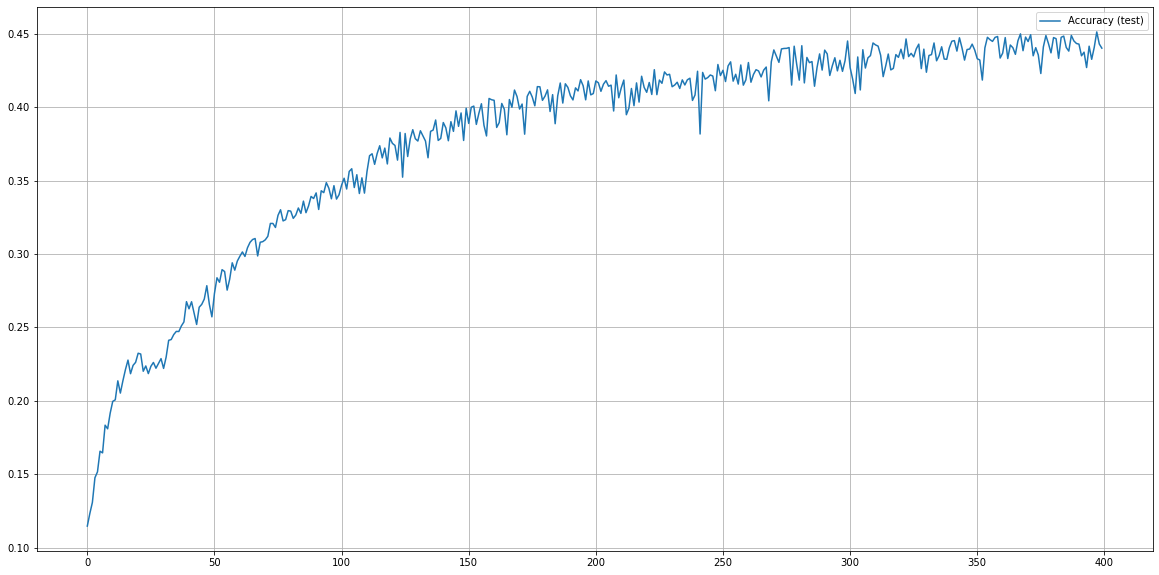

In [30]:
plt.figure(figsize = [20, 10])
plt.plot(history3.history['val_acc'] + history4.history['val_acc'], label = 'Accuracy (test)')
plt.grid()
plt.legend()
plt.show()

In [31]:
model4 = Sequential()
model4.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = True))
model4.add(layers.GlobalMaxPool1D())
model4.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(10, activation = 'softmax'))
model4.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history5 = model4.fit(XTrain, yTrain, epochs = 400, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/400
350/350 [==============================] - 6s 18ms/step - loss: 2.6114 - acc: 0.1078 - val_loss: 2.4086 - val_acc: 0.1263
Epoch 2/400
350/350 [==============================] - 6s 17ms/step - loss: 2.4091 - acc: 0.1114 - val_loss: 2.3882 - val_acc: 0.1389
Epoch 3/400
350/350 [==============================] - 6s 18ms/step - loss: 2.3898 - acc: 0.1183 - val_loss: 2.3709 - val_acc: 0.1449
Epoch 4/400
350/350 [==============================] - 6s 18ms/step - loss: 2.3733 - acc: 0.1241 - val_loss: 2.3545 - val_acc: 0.1566
Epoch 5/400
350/350 [==============================] - 6s 18ms/step - loss: 2.3570 - acc: 0.1291 - val_loss: 2.3365 - val_acc: 0.1769
Epoch 6/400
350/350 [==============================] - 6s 18ms/step - loss: 2.3404 - acc: 0.1410 - val_loss: 2.3207 - val_acc: 0.1883
Epoch 7/400
350/350 [==============================] - 7s 19ms/step - loss: 2.3260 - acc: 0.1426 - val_loss: 2.3057 - val_acc: 0.2033
Epoch 8/400
350/350 [==============================] - 7s 19ms

Epoch 62/400
350/350 [==============================] - 9s 26ms/step - loss: 2.0178 - acc: 0.2750 - val_loss: 1.9082 - val_acc: 0.3782
Epoch 63/400
350/350 [==============================] - 9s 26ms/step - loss: 2.0159 - acc: 0.2721 - val_loss: 1.8988 - val_acc: 0.3943
Epoch 64/400
350/350 [==============================] - 8s 24ms/step - loss: 2.0170 - acc: 0.2750 - val_loss: 1.8983 - val_acc: 0.3802
Epoch 65/400
350/350 [==============================] - 8s 23ms/step - loss: 2.0160 - acc: 0.2701 - val_loss: 1.8876 - val_acc: 0.3872
Epoch 66/400
350/350 [==============================] - 9s 25ms/step - loss: 2.0092 - acc: 0.2766 - val_loss: 1.8960 - val_acc: 0.3865
Epoch 67/400
350/350 [==============================] - 9s 27ms/step - loss: 2.0036 - acc: 0.2761 - val_loss: 1.8858 - val_acc: 0.3817
Epoch 68/400
350/350 [==============================] - 8s 24ms/step - loss: 2.0196 - acc: 0.2733 - val_loss: 1.8893 - val_acc: 0.3961
Epoch 69/400
350/350 [==============================] -

350/350 [==============================] - 9s 25ms/step - loss: 1.9013 - acc: 0.3109 - val_loss: 1.7385 - val_acc: 0.4272
Epoch 123/400
350/350 [==============================] - 8s 24ms/step - loss: 1.9050 - acc: 0.3093 - val_loss: 1.7656 - val_acc: 0.4318
Epoch 124/400
350/350 [==============================] - 9s 26ms/step - loss: 1.9004 - acc: 0.3079 - val_loss: 1.7422 - val_acc: 0.4309
Epoch 125/400
350/350 [==============================] - 9s 25ms/step - loss: 1.9095 - acc: 0.3080 - val_loss: 1.7396 - val_acc: 0.4225
Epoch 126/400
350/350 [==============================] - 8s 23ms/step - loss: 1.9032 - acc: 0.3043 - val_loss: 1.7299 - val_acc: 0.4349
Epoch 127/400
350/350 [==============================] - 8s 23ms/step - loss: 1.9064 - acc: 0.3055 - val_loss: 1.7554 - val_acc: 0.4279
Epoch 128/400
350/350 [==============================] - 8s 22ms/step - loss: 1.8943 - acc: 0.3136 - val_loss: 1.7408 - val_acc: 0.4297
Epoch 129/400
350/350 [==============================] - 8s 22

350/350 [==============================] - 9s 25ms/step - loss: 1.8599 - acc: 0.3269 - val_loss: 1.6896 - val_acc: 0.4331
Epoch 183/400
350/350 [==============================] - 8s 23ms/step - loss: 1.8571 - acc: 0.3237 - val_loss: 1.7110 - val_acc: 0.4532
Epoch 184/400
350/350 [==============================] - 9s 26ms/step - loss: 1.8539 - acc: 0.3297 - val_loss: 1.7307 - val_acc: 0.4481
Epoch 185/400
350/350 [==============================] - 9s 25ms/step - loss: 1.8543 - acc: 0.3235 - val_loss: 1.6791 - val_acc: 0.4488
Epoch 186/400
350/350 [==============================] - 9s 26ms/step - loss: 1.8500 - acc: 0.3260 - val_loss: 1.6778 - val_acc: 0.4535s - loss: 1.8500 - acc: 0.326
Epoch 187/400
350/350 [==============================] - 9s 26ms/step - loss: 1.8549 - acc: 0.3229 - val_loss: 1.6762 - val_acc: 0.4459
Epoch 188/400
350/350 [==============================] - 8s 22ms/step - loss: 1.8612 - acc: 0.3242 - val_loss: 1.6662 - val_acc: 0.4519
Epoch 189/400
350/350 [==========

350/350 [==============================] - 8s 24ms/step - loss: 1.8191 - acc: 0.3390 - val_loss: 1.6285 - val_acc: 0.4664
Epoch 243/400
350/350 [==============================] - 10s 28ms/step - loss: 1.8250 - acc: 0.3387 - val_loss: 1.6486 - val_acc: 0.4635
Epoch 244/400
350/350 [==============================] - 10s 27ms/step - loss: 1.8223 - acc: 0.3366 - val_loss: 1.6203 - val_acc: 0.4647
Epoch 245/400
350/350 [==============================] - 12s 33ms/step - loss: 1.8217 - acc: 0.3389 - val_loss: 1.6242 - val_acc: 0.4650
Epoch 246/400
350/350 [==============================] - 10s 28ms/step - loss: 1.8267 - acc: 0.3352 - val_loss: 1.6456 - val_acc: 0.4613
Epoch 247/400
350/350 [==============================] - 10s 28ms/step - loss: 1.8167 - acc: 0.3394 - val_loss: 1.7069 - val_acc: 0.4539
Epoch 248/400
350/350 [==============================] - 11s 30ms/step - loss: 1.8181 - acc: 0.3408 - val_loss: 1.6608 - val_acc: 0.4407
Epoch 249/400
350/350 [==============================] -

350/350 [==============================] - 11s 32ms/step - loss: 1.8094 - acc: 0.3386 - val_loss: 1.6126 - val_acc: 0.4658
Epoch 303/400
350/350 [==============================] - 11s 32ms/step - loss: 1.8040 - acc: 0.3407 - val_loss: 1.6071 - val_acc: 0.4645
Epoch 304/400
350/350 [==============================] - 10s 29ms/step - loss: 1.7982 - acc: 0.3493 - val_loss: 1.5951 - val_acc: 0.4699
Epoch 305/400
350/350 [==============================] - 9s 25ms/step - loss: 1.7985 - acc: 0.3441 - val_loss: 1.5905 - val_acc: 0.4680
Epoch 306/400
350/350 [==============================] - 9s 24ms/step - loss: 1.7984 - acc: 0.3437 - val_loss: 1.6389 - val_acc: 0.4733
Epoch 307/400
350/350 [==============================] - 8s 24ms/step - loss: 1.7998 - acc: 0.3440 - val_loss: 1.6359 - val_acc: 0.4735
Epoch 308/400
350/350 [==============================] - 9s 26ms/step - loss: 1.8047 - acc: 0.3413 - val_loss: 1.6146 - val_acc: 0.4637
Epoch 309/400
350/350 [==============================] - 8s

350/350 [==============================] - 9s 25ms/step - loss: 1.7833 - acc: 0.3538 - val_loss: 1.5842 - val_acc: 0.4790
Epoch 363/400
350/350 [==============================] - 8s 23ms/step - loss: 1.7941 - acc: 0.3492 - val_loss: 1.5718 - val_acc: 0.4713
Epoch 364/400
350/350 [==============================] - 9s 24ms/step - loss: 1.7808 - acc: 0.3521 - val_loss: 1.5763 - val_acc: 0.4763
Epoch 365/400
350/350 [==============================] - 10s 27ms/step - loss: 1.7796 - acc: 0.3495 - val_loss: 1.5627 - val_acc: 0.4771
Epoch 366/400
350/350 [==============================] - 8s 24ms/step - loss: 1.7796 - acc: 0.3504 - val_loss: 1.5801 - val_acc: 0.4758
Epoch 367/400
350/350 [==============================] - 9s 26ms/step - loss: 1.7797 - acc: 0.3493 - val_loss: 1.5711 - val_acc: 0.4779
Epoch 368/400
350/350 [==============================] - 9s 26ms/step - loss: 1.7871 - acc: 0.3522 - val_loss: 1.5905 - val_acc: 0.4791
Epoch 369/400
350/350 [==============================] - 8s 2

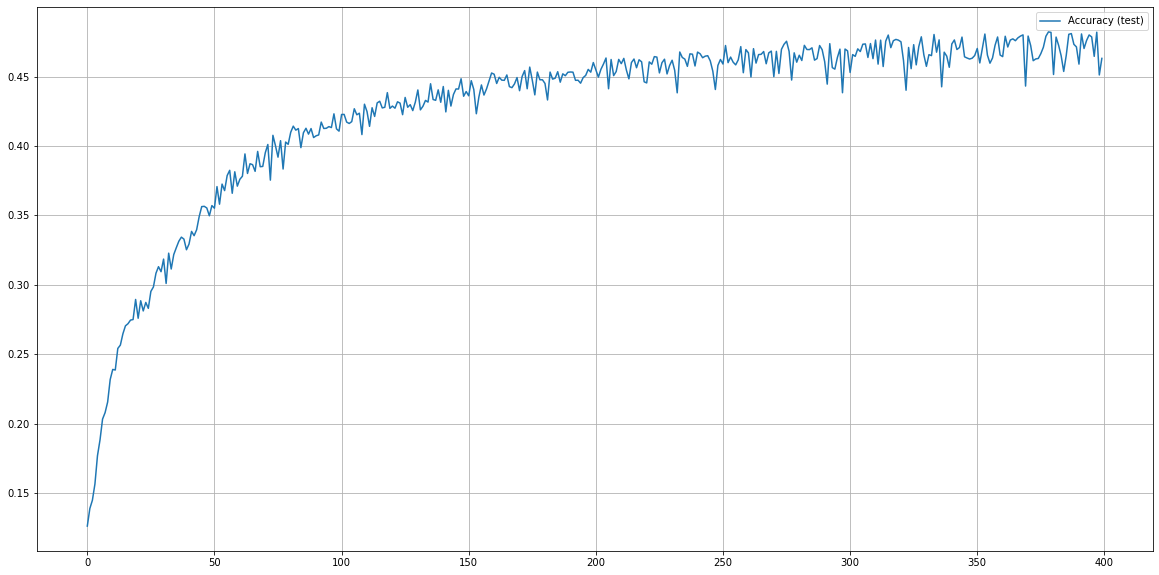

In [32]:
plt.figure(figsize = [20, 10])
plt.plot(history5.history['val_acc'], label = 'Accuracy (test)')
plt.grid()
plt.legend()
plt.show()

In [33]:
model5 = Sequential()
model5.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = False))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(10, activation = 'softmax'))
model5.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history6 = model5.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4561 - acc: 0.1131 - val_loss: 2.4194 - val_acc: 0.1242
Epoch 2/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4166 - acc: 0.1156 - val_loss: 2.3991 - val_acc: 0.1309
Epoch 3/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3987 - acc: 0.1226 - val_loss: 2.3832 - val_acc: 0.1302
Epoch 4/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3848 - acc: 0.1211 - val_loss: 2.3683 - val_acc: 0.1403
Epoch 5/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3714 - acc: 0.1165 - val_loss: 2.3546 - val_acc: 0.1441
Epoch 6/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3572 - acc: 0.1262 - val_loss: 2.3454 - val_acc: 0.1527
Epoch 7/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3459 - acc: 0.1285 - val_loss: 2.3332 - val_acc: 0.1665
Epoch 8/200
350/350 [==============================] - 2s 5ms/step - 

350/350 [==============================] - 3s 8ms/step - loss: 2.1594 - acc: 0.2173 - val_loss: 2.0926 - val_acc: 0.3094
Epoch 63/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1529 - acc: 0.2198 - val_loss: 2.0979 - val_acc: 0.3174
Epoch 64/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1555 - acc: 0.2194 - val_loss: 2.0867 - val_acc: 0.3155
Epoch 65/200
350/350 [==============================] - 4s 10ms/step - loss: 2.1610 - acc: 0.2155 - val_loss: 2.0928 - val_acc: 0.3076
Epoch 66/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1558 - acc: 0.2180 - val_loss: 2.1047 - val_acc: 0.3009
Epoch 67/200
350/350 [==============================] - 3s 8ms/step - loss: 2.1589 - acc: 0.2213 - val_loss: 2.0854 - val_acc: 0.3150
Epoch 68/200
350/350 [==============================] - 3s 8ms/step - loss: 2.1605 - acc: 0.2165 - val_loss: 2.0835 - val_acc: 0.3147
Epoch 69/200
350/350 [==============================] - 2s 7ms/step - loss

Epoch 123/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1387 - acc: 0.2272 - val_loss: 2.0492 - val_acc: 0.2982
Epoch 124/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1308 - acc: 0.2244 - val_loss: 2.0423 - val_acc: 0.3175
Epoch 125/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1263 - acc: 0.2310 - val_loss: 2.0515 - val_acc: 0.3207
Epoch 126/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1346 - acc: 0.2239 - val_loss: 2.0456 - val_acc: 0.3213
Epoch 127/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1253 - acc: 0.2337 - val_loss: 2.0446 - val_acc: 0.3239
Epoch 128/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1344 - acc: 0.2260 - val_loss: 2.0419 - val_acc: 0.3284
Epoch 129/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1331 - acc: 0.2308 - val_loss: 2.0764 - val_acc: 0.2986
Epoch 130/200
350/350 [==============================] 

350/350 [==============================] - 3s 7ms/step - loss: 2.1321 - acc: 0.2289 - val_loss: 2.0360 - val_acc: 0.2944
Epoch 184/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1311 - acc: 0.2268 - val_loss: 2.0449 - val_acc: 0.3125
Epoch 185/200
350/350 [==============================] - 3s 8ms/step - loss: 2.1217 - acc: 0.2298 - val_loss: 2.0943 - val_acc: 0.3066
Epoch 186/200
350/350 [==============================] - 3s 8ms/step - loss: 2.1268 - acc: 0.2283 - val_loss: 2.0716 - val_acc: 0.2924
Epoch 187/200
350/350 [==============================] - 3s 9ms/step - loss: 2.1182 - acc: 0.2332 - val_loss: 2.0503 - val_acc: 0.3129
Epoch 188/200
350/350 [==============================] - 4s 10ms/step - loss: 2.1230 - acc: 0.2296 - val_loss: 2.0295 - val_acc: 0.3216
Epoch 189/200
350/350 [==============================] - 4s 11ms/step - loss: 2.1269 - acc: 0.2270 - val_loss: 2.0208 - val_acc: 0.3231
Epoch 190/200
350/350 [==============================] - 3s 10ms/st

In [34]:
model5.layers[0].trainable = True
model5.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history7 = model5.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 6s 17ms/step - loss: 2.1210 - acc: 0.2282 - val_loss: 2.0506 - val_acc: 0.3257
Epoch 2/200
350/350 [==============================] - 6s 17ms/step - loss: 2.1269 - acc: 0.2353 - val_loss: 2.0272 - val_acc: 0.3029
Epoch 3/200
350/350 [==============================] - 6s 17ms/step - loss: 2.1121 - acc: 0.2316 - val_loss: 2.0483 - val_acc: 0.3243
Epoch 4/200
350/350 [==============================] - 6s 17ms/step - loss: 2.1151 - acc: 0.2331 - val_loss: 2.0294 - val_acc: 0.3139
Epoch 5/200
350/350 [==============================] - 7s 19ms/step - loss: 2.1045 - acc: 0.2323 - val_loss: 1.9967 - val_acc: 0.3441
Epoch 6/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0965 - acc: 0.2407 - val_loss: 2.0056 - val_acc: 0.3461
Epoch 7/200
350/350 [==============================] - 7s 19ms/step - loss: 2.0930 - acc: 0.2396 - val_loss: 2.0098 - val_acc: 0.3272
Epoch 8/200
350/350 [==============================] - 8s 23ms

350/350 [==============================] - 11s 30ms/step - loss: 1.9621 - acc: 0.2840 - val_loss: 1.8325 - val_acc: 0.4148
Epoch 62/200
350/350 [==============================] - 10s 29ms/step - loss: 1.9618 - acc: 0.2881 - val_loss: 1.8423 - val_acc: 0.4093
Epoch 63/200
350/350 [==============================] - 11s 31ms/step - loss: 1.9511 - acc: 0.2919 - val_loss: 1.7768 - val_acc: 0.3923
Epoch 64/200
350/350 [==============================] - 9s 26ms/step - loss: 1.9547 - acc: 0.2906 - val_loss: 1.8310 - val_acc: 0.4115
Epoch 65/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9618 - acc: 0.2849 - val_loss: 1.8033 - val_acc: 0.4215
Epoch 66/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9568 - acc: 0.2853 - val_loss: 1.8202 - val_acc: 0.3903
Epoch 67/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9661 - acc: 0.2859 - val_loss: 1.7700 - val_acc: 0.4101
Epoch 68/200
350/350 [==============================] - 8s 24ms/s

350/350 [==============================] - 9s 26ms/step - loss: 1.9052 - acc: 0.3061 - val_loss: 1.7272 - val_acc: 0.4477
Epoch 122/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8997 - acc: 0.3091 - val_loss: 1.7675 - val_acc: 0.4402
Epoch 123/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8918 - acc: 0.3049 - val_loss: 1.7073 - val_acc: 0.4361
Epoch 124/200
350/350 [==============================] - 9s 26ms/step - loss: 1.9054 - acc: 0.3031 - val_loss: 1.7572 - val_acc: 0.4247
Epoch 125/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8975 - acc: 0.3069 - val_loss: 1.7185 - val_acc: 0.4429
Epoch 126/200
350/350 [==============================] - 10s 28ms/step - loss: 1.8914 - acc: 0.3101 - val_loss: 1.7357 - val_acc: 0.4409
Epoch 127/200
350/350 [==============================] - 9s 27ms/step - loss: 1.8904 - acc: 0.3081 - val_loss: 1.6986 - val_acc: 0.4487
Epoch 128/200
350/350 [==============================] - 10s 

350/350 [==============================] - 9s 26ms/step - loss: 1.8582 - acc: 0.3228 - val_loss: 1.6723 - val_acc: 0.4659
Epoch 182/200
350/350 [==============================] - 8s 24ms/step - loss: 1.8628 - acc: 0.3183 - val_loss: 1.6827 - val_acc: 0.4529
Epoch 183/200
350/350 [==============================] - 8s 22ms/step - loss: 1.8552 - acc: 0.3191 - val_loss: 1.6482 - val_acc: 0.4531
Epoch 184/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8597 - acc: 0.3185 - val_loss: 1.6687 - val_acc: 0.4495
Epoch 185/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8580 - acc: 0.3186 - val_loss: 1.6873 - val_acc: 0.4576
Epoch 186/200
350/350 [==============================] - 8s 23ms/step - loss: 1.8631 - acc: 0.3149 - val_loss: 1.6780 - val_acc: 0.4612
Epoch 187/200
350/350 [==============================] - 9s 25ms/step - loss: 1.8576 - acc: 0.3169 - val_loss: 1.6610 - val_acc: 0.4627
Epoch 188/200
350/350 [==============================] - 9s 25

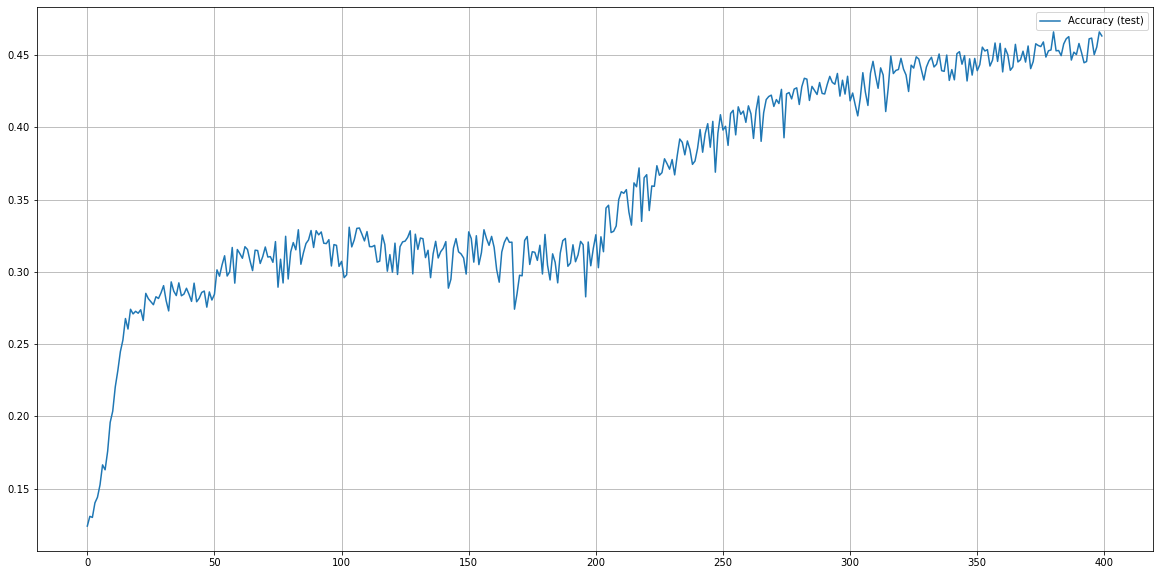

In [35]:
plt.figure(figsize = [20, 10])
plt.plot(history6.history['val_acc'] + history7.history['val_acc'], label = 'Accuracy (test)')
plt.grid()
plt.legend()
plt.show()